<a href="https://colab.research.google.com/github/Chimamuelo/Coding-Nomads-Deep-Learning-1/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Splitting

## Setup

In [118]:
!pip install torchmetrics attrdict -q

In [119]:
%%capture
# Install libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torchmetrics

## Download the dataset

In [120]:
df=pd.read_csv('https://raw.githubusercontent.com/Chimamuelo/Coding-Nomads-Deep-Learning-1/master/Data/train.csv')
df_test=pd.read_csv('https://raw.githubusercontent.com/Chimamuelo/Coding-Nomads-Deep-Learning-1/master/Data/test.csv')

## Split your data

In [121]:
train=df.loc[:,df.columns!='Survived']
valid=df['Survived']

# EDA & data visualization

In [122]:
print(train.shape)
print(valid.shape)

(891, 11)
(891,)


In [123]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
valid

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [125]:
for column in train.columns:
  data_type=train[column].dtypes
  print(column,data_type)

PassengerId int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Cabin object
Embarked object


In [126]:
train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

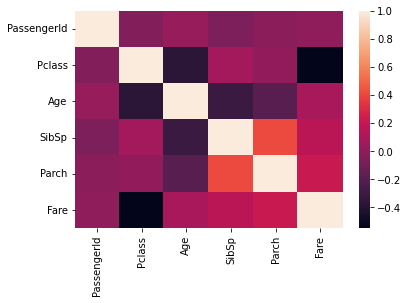

In [128]:
sns.heatmap(train.corr());

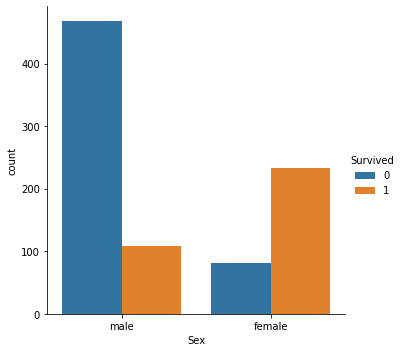

In [129]:
sns.catplot(x='Sex',hue='Survived',data=df,kind='count')

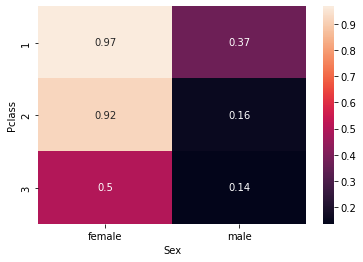

In [130]:
heatmap1_data = pd.pivot_table(df, values='Survived', 
                     index=['Pclass'], 
                     columns='Sex')
sns.heatmap(heatmap1_data,annot=True)

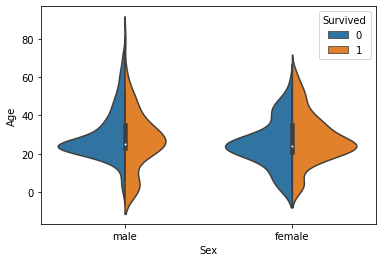

In [131]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

# Feature engineering and transformation

In [132]:
from sklearn.preprocessing import OrdinalEncoder

In [133]:
oe=OrdinalEncoder(categories='auto')
df['Pclass']=oe.fit_transform(df[['Pclass']])

In [134]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,2.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,2.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,0.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,2.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,0.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [135]:
df=pd.concat([df,pd.get_dummies(df['Sex'],prefix='Sex')],axis=1)
df.drop(['Sex'],axis=1,inplace=True)

In [136]:
df=pd.concat([df,pd.get_dummies(df['Embarked'],prefix='Embarked')],axis=1)
df.drop(['Embarked'],axis=1,inplace=True)

In [137]:
df.drop('Name',axis=1,inplace=True)

In [138]:
df.drop('Ticket',axis=1,inplace=True)

In [139]:
df.drop('Cabin',axis=1,inplace=True)

In [140]:
df.drop(['PassengerId'],axis=1,inplace=True)

# Traditional ML modeling

In [141]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [142]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,stratify=y)

In [144]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
528,2.0,39.0,0,0,7.9250,0,1,0,0,1
290,0.0,26.0,0,0,78.8500,1,0,0,0,1
530,1.0,2.0,1,1,26.0000,1,0,0,0,1
97,0.0,23.0,0,1,63.3583,0,1,1,0,0
193,1.0,3.0,1,1,26.0000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7,2.0,2.0,3,1,21.0750,0,1,0,0,1
213,1.0,30.0,0,0,13.0000,0,1,0,0,1
121,2.0,24.0,0,0,8.0500,0,1,0,0,1
69,2.0,26.0,2,0,8.6625,0,1,0,0,1


In [145]:
y_test

528    0
290    1
530    1
97     1
193    1
      ..
7      0
213    0
121    0
69     0
888    0
Name: Survived, Length: 179, dtype: int64

In [146]:
y_train

479    1
327    1
847    0
166    1
812    0
      ..
14     0
728    0
773    0
580    1
216    1
Name: Survived, Length: 712, dtype: int64

In [147]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
479,2.0,2.0,0,1,12.2875,1,0,0,0,1
327,1.0,36.0,0,0,13.0000,1,0,0,0,1
847,2.0,35.0,0,0,7.8958,0,1,1,0,0
166,0.0,24.0,0,1,55.0000,1,0,0,0,1
812,1.0,35.0,0,0,10.5000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14,2.0,14.0,0,0,7.8542,1,0,0,0,1
728,1.0,25.0,1,0,26.0000,0,1,0,0,1
773,2.0,24.0,0,0,7.2250,0,1,1,0,0
580,1.0,25.0,1,1,30.0000,1,0,0,0,1


In [148]:
model=RandomForestClassifier()
param_grid = {
                 'n_estimators': [5, 10, 15, 20,30],
                 'max_depth': [2, 5, 7, 9,11,15,20]
             }

In [149]:
grid_clf = GridSearchCV(model, param_grid, cv=10)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 9, 11, 15, 20],
                         'n_estimators': [5, 10, 15, 20, 30]})

In [150]:
mod=xgb.XGBClassifier()
mod.fit(X_train,y_train)

XGBClassifier()

In [151]:
grid_clf.best_params_

{'max_depth': 11, 'n_estimators': 30}

In [152]:
final_model=grid_clf.best_estimator_

In [153]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, fbeta_score

In [154]:
pred=final_model.predict(X_test)
predict=mod.predict(X_test)

In [155]:
precision = precision_score(y_test,pred)
prec=precision_score(y_test,predict)
print(precision,prec)

0.8387096774193549 0.85


In [156]:
## recall
recall=recall_score(y_test,pred)
rec=recall_score(y_test,predict)
print(recall,rec)

0.7536231884057971 0.7391304347826086


In [157]:
score=f1_score(y_test,pred)
score_g=f1_score(y_test,predict)
print(score,score_g)


0.7938931297709925 0.7906976744186046


In [158]:
con_matrix=confusion_matrix(y_test,pred)
con_matrix

array([[100,  10],
       [ 17,  52]])

[]

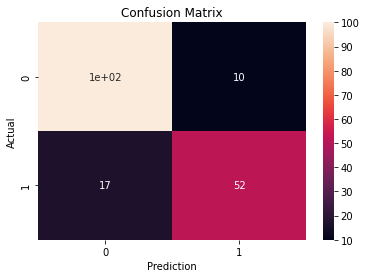

In [159]:
ax=sns.heatmap(con_matrix,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.plot()

In [160]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [161]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mode()[0])
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [162]:
oe=OrdinalEncoder(categories='auto')
df_test['Pclass']=oe.fit_transform(df_test[['Pclass']])

In [163]:
df_test=pd.concat([df_test,pd.get_dummies(df_test['Sex'],prefix='Sex')],axis=1)
df_test.drop(['Sex'],axis=1,inplace=True)

In [164]:
df_test=pd.concat([df_test,pd.get_dummies(df_test['Embarked'],prefix='Embarked')],axis=1)
df_test.drop(['Embarked'],axis=1,inplace=True)

In [165]:
df_test.drop('Name',axis=1,inplace=True)

In [166]:
df_test.drop('Ticket',axis=1,inplace=True)

In [167]:
df_test.drop('Cabin',axis=1,inplace=True)

In [168]:
idx=df_test['PassengerId']
df_test.drop('PassengerId',axis=1,inplace=True)

In [169]:
prediction=final_model.predict(df_test)
predictions=mod.predict(df_test)

In [170]:
out=prediction.round().astype(int)
outs=predictions.round().astype(int)

In [171]:
out

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [172]:
final=pd.concat([idx,pd.DataFrame(data=out,columns=['Survived'])],axis=1)
finals=pd.concat([idx,pd.DataFrame(data=outs,columns=['Survived'])],axis=1)

In [173]:
final.to_csv('no_deep.csv',index=False)

In [174]:
finals.to_csv('xgb.csv',index=False)

# Pure `torch` model

In [175]:
import torch
from torch import nn
import torch.nn.functional as F


from torch.utils.data import Dataset, DataLoader

In [176]:
#Create Dataset
class Titanic(Dataset):
  def __init__(self,x,y):
    super().__init__()

    #X,y as train and label ds
    self.X=torch.tensor(x.to_numpy(),dtype=torch.float32)
    self.y=torch.tensor(y.to_numpy(),dtype=torch.float32)

  def __len__(self):
    return len(self.X)
  
  
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]




In [177]:
train_ds=Titanic(X_train,y_train)
valid_ds=Titanic(X_test,y_test)

In [178]:
X.describe

<bound method NDFrame.describe of      Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       2.0  22.0      1      0   7.2500           0         1           0   
1       0.0  38.0      1      0  71.2833           1         0           1   
2       2.0  26.0      0      0   7.9250           1         0           0   
3       0.0  35.0      1      0  53.1000           1         0           0   
4       2.0  35.0      0      0   8.0500           0         1           0   
..      ...   ...    ...    ...      ...         ...       ...         ...   
886     1.0  27.0      0      0  13.0000           0         1           0   
887     0.0  19.0      0      0  30.0000           1         0           0   
888     2.0  24.0      1      2  23.4500           1         0           0   
889     0.0  26.0      0      0  30.0000           0         1           1   
890     2.0  32.0      0      0   7.7500           0         1           0   

     Embarked_Q  Embarked_S  

In [179]:
train_ds[2]

(tensor([ 2.0000, 35.0000,  0.0000,  0.0000,  7.8958,  0.0000,  1.0000,  1.0000,
          0.0000,  0.0000]), tensor(0.))

In [180]:
valid_ds[2]

(tensor([ 1.,  2.,  1.,  1., 26.,  1.,  0.,  0.,  0.,  1.]), tensor(1.))

In [181]:
# Create Dataloader
train_dl =DataLoader(train_ds,
                     batch_size=128,
                     shuffle=True,
                     )
valid_dl =DataLoader(valid_ds,
                     batch_size=128,
                     
                     )

In [182]:
train_iter=iter(train_dl)
input,label=train_iter.next()
print(input.shape[1])

10


In [245]:
#build model
def model(input_features,output_features,n_label):
  
  
  model=nn.Sequential(
      nn.Linear(input_features,output_features),
      nn.ReLU(),
      nn.BatchNorm1d(output_features),
      nn.Dropout(.2),
      nn.Linear(int(output_features),int(output_features)),
      nn.ReLU(),
      nn.BatchNorm1d(int(output_features)),
      nn.Dropout(.2),
      nn.Linear(int(output_features),n_label)
                      )
  return model


In [246]:
model=model(10,256,2)

In [247]:
device = torch.device("cuda")
try:
  model.to(device)
except:
  print('Model device: ', next(model.parameters()).device)

In [248]:
len(model)

9

In [249]:
for x_b, y_b in train_dl:
    break
model(x_b.to(device)).shape



torch.Size([128, 2])

In [277]:
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr=.001)
metric = torchmetrics.F1Score()

In [278]:
def train_step(x_b, y_b):

    x_b = x_b.to(device)
    y_b = y_b.to(device)
  
    yhat = model(x_b)
    
 
    loss = loss_func(yhat,y_b)
 
    loss.backward()

    opt.step()
    opt.zero_grad()


    batch_acc = metric(yhat.cpu(), y_b.cpu())


    return loss

In [279]:
def validation_step(x_b, y_b):
    
    x_b = x_b.to(device)
    y_b = y_b.to(device)
    
    with torch.no_grad():
        
        yhat =model(x_b)
       
        loss =loss_func(yhat,y_b)


    batch_acc = metric(yhat.cpu(), y_b.cpu())

   
    return loss

In [280]:
N_EPOCHS = 10

In [281]:
train_losses_step = []
train_losses = []
valid_losses = []
for epoch in range(N_EPOCHS):
   
  model.train() 
  train_loss_epoch = 0.
  for x_b, y_b in train_dl:
    
    y_b=y_b.type(torch.LongTensor)
 
    
    loss = train_step(x_b, y_b)
    train_loss_epoch += loss
    train_losses_step.append(loss.item())

  train_loss_epoch /= len(train_dl)
  train_losses.append(train_loss_epoch.item())
  train_acc = metric.compute()
    
    # Validation loop
  model.eval() # Put the model in eval mode (affects dropout and batch norm)
  val_loss_epoch = 0.
  for x_b, y_b in valid_dl:
    y_b=y_b.type(torch.LongTensor)
       
        
    loss = validation_step(x_b, y_b)
    val_loss_epoch += loss
    
  val_loss_epoch /= len(valid_dl)
  valid_acc = metric.compute()
  valid_losses.append(val_loss_epoch.item())

  print(f"Epoch: {epoch}, Train loss: {train_loss_epoch:.04f} Train acc: {float(train_acc):.04f}, Valid loss: {val_loss_epoch} Valid Acc: {float(valid_acc):.04f}")

Epoch: 0, Train loss: 0.4712 Train acc: 0.7879, Valid loss: 0.38023456931114197 Valid Acc: 0.7935
Epoch: 1, Train loss: 0.4495 Train acc: 0.7973, Valid loss: 0.4070182740688324 Valid Acc: 0.7974
Epoch: 2, Train loss: 0.4291 Train acc: 0.8003, Valid loss: 0.38459500670433044 Valid Acc: 0.8017
Epoch: 3, Train loss: 0.4549 Train acc: 0.8006, Valid loss: 0.38835760951042175 Valid Acc: 0.8022
Epoch: 4, Train loss: 0.4461 Train acc: 0.8026, Valid loss: 0.36832523345947266 Valid Acc: 0.8034
Epoch: 5, Train loss: 0.4285 Train acc: 0.8032, Valid loss: 0.3918454051017761 Valid Acc: 0.8038
Epoch: 6, Train loss: 0.4227 Train acc: 0.8049, Valid loss: 0.3854254186153412 Valid Acc: 0.8055
Epoch: 7, Train loss: 0.4221 Train acc: 0.8072, Valid loss: 0.38148459792137146 Valid Acc: 0.8077
Epoch: 8, Train loss: 0.4170 Train acc: 0.8088, Valid loss: 0.40707165002822876 Valid Acc: 0.8088
Epoch: 9, Train loss: 0.4110 Train acc: 0.8090, Valid loss: 0.37538403272628784 Valid Acc: 0.8093


In [282]:
input_tensor=torch.tensor(df_test.values,dtype=torch.float32)
input_tensor=input_tensor.to(device)
final=model(input_tensor)

In [284]:

pred = torch.argmax(final, dim=1)
pred

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

Text(0.5, 0, 'Epoch')

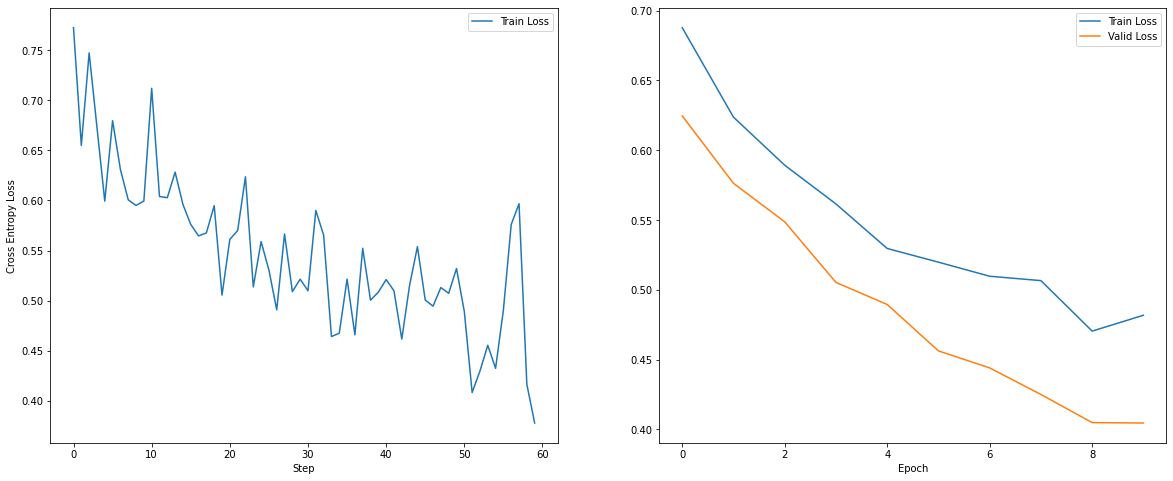

In [256]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,8))
ax1, ax2 = axes
ax1.plot(train_losses_step, label='Train Loss')
ax2.plot(train_losses, label='Train Loss')
ax2.plot(valid_losses, label='Valid Loss')
ax1.legend()
ax2.legend()
ax1.set_xlabel('Step')
ax1.set_ylabel('Cross Entropy Loss')
ax2.set_xlabel('Epoch')

# High-level libraries and tabular frameworks

# Model selection and test set evaluation

In [194]:
# Your code here

# Notes and findings

What did you learn?